# EDA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
file_loc1 = '../data/ar-2010-2014-csv.csv'
file_loc2 = '../data/ar-2015-2016-csv.csv'

In [3]:
def read_data(path1,path2, set_index = None):
    data1 = pd.read_csv(path1, index_col = set_index)
    data2 = pd.read_csv(path2, index_col = set_index)
    frames = [data1,data2]
    
    combined = pd.concat(frames)
    
    return combined

In [4]:
data = read_data(file_loc1,file_loc2)
data

,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,...,Heart Three Birth Weight,Heart Three Sex,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Weeks Gestation,Heart Four Birth Outcome,Heart Four Birth Weight,Heart Four Sex,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities
0,18 - 34,NaN,1,1,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18 - 34,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38-39,NaN,1,1,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158514,18 - 34,NaN,3,3,0,3,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158515,38-39,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158516,38-39,NaN,1,1,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158517,18 - 34,NaN,2,0,0,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Notes
<li>1. We only need data which are related to IVF treatment. Hence we could exclude Non-IVF data.</li>
<li>2. We will only use 30 independent variables as suggested in <a href="https://www.nature.com/articles/s41598-020-76928-z">this paper</a>.</li>

<b>Exclude DI data:</b>

In [5]:
data['Type of treatment - IVF or DI'].value_counts()

IVF    463358
DI      32270
Name: Type of treatment - IVF or DI, dtype: int64

In [6]:
def exclude_di(data_in):
    """
    Function to exlude DI data
    """
    data = data_in.copy()
    data = data[data['Type of treatment - IVF or DI'] != 'DI']
    return data

In [7]:
excluded_ = exclude_di(data)

excluded_['Type of treatment - IVF or DI'].value_counts()

IVF    463358
Name: Type of treatment - IVF or DI, dtype: int64

<b>Exclude unnecessary feature:</b>

In [8]:
# feature to include
feats = ['Patient Age at Treatment',
        'Total Number of Previous IVF cycles',
        'Total number of IVF pregnancies',
        'Total number of live births - conceived through IVF',
        'Type of Infertility - Female Primary',
        'Type of Infertility - Female Secondary',
        'Type of Infertility - Male Primary',
        'Type of Infertility - Male Secondary',
        'Type of Infertility -Couple Primary',
        'Type of Infertility -Couple Secondary',
        'Cause  of Infertility - Tubal disease',
        'Cause of Infertility - Ovulatory Disorder',
        'Cause of Infertility - Male Factor',
        'Cause of Infertility - Patient Unexplained',
        'Cause of Infertility - Endometriosis',
        'Cause of Infertility - Cervical factors',
        'Cause of Infertility - Female Factors',
        'Cause of Infertility - Partner Sperm Concentration',
        'Cause of Infertility -  Partner Sperm Morphology',
        'Causes of Infertility - Partner Sperm Motility',
        'Cause of Infertility -  Partner Sperm Immunological factors',
        'Stimulation used',
        'Egg Source',
        'Sperm From', 
        'Fresh Cycle', 
        'Frozen Cycle', 
        'Eggs Thawed',
        'Fresh Eggs Collected', 
        'Eggs Mixed With Partner Sperm',
        'Embryos Transfered',
        'Live Birth Occurrence']

In [9]:
def filtered(data_in):
    '''
    Function to select only the necessary feature
    '''
    data = data_in.copy()
    feature_list = feats
    data = data[feats]
    
    return data

In [10]:
filtered_ = filtered(excluded_)

filtered_.columns

Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility - Female Factors',
       'Cause of Infertility - Partner Sperm Concentration',
       'Cause of Infertility -  Partner Sperm Morphology',
       'Causes of Infertility - Partner Sperm Motility',
       'Cause of Inf

# Missing Values

In [11]:
filtered_.isna().sum()

Patient Age at Treatment                                            0
Total Number of Previous IVF cycles                                 0
Total number of IVF pregnancies                                     0
Total number of live births - conceived through IVF                 0
Type of Infertility - Female Primary                                0
Type of Infertility - Female Secondary                              0
Type of Infertility - Male Primary                                  0
Type of Infertility - Male Secondary                                0
Type of Infertility -Couple Primary                                 0
Type of Infertility -Couple Secondary                               0
Cause  of Infertility - Tubal disease                               0
Cause of Infertility - Ovulatory Disorder                           0
Cause of Infertility - Male Factor                                  0
Cause of Infertility - Patient Unexplained                          0
Cause of Infertility

In [12]:
filtered_['Live Birth Occurrence'].value_counts()

1.0    115012
Name: Live Birth Occurrence, dtype: int64

### Findings

'Live Birth Occurence' column which is the Target Variable consist a total of 348,346 missing values. It seems that the missing values were supposed to be valued as 0, which means no live birth was occurred.

In [13]:
# imputation
def imputation(df_in):
    data = df_in.fillna(0)
    
    return data

In [14]:
impute = imputation(filtered_)

impute.isna().sum()

Patient Age at Treatment                                       0
Total Number of Previous IVF cycles                            0
Total number of IVF pregnancies                                0
Total number of live births - conceived through IVF            0
Type of Infertility - Female Primary                           0
Type of Infertility - Female Secondary                         0
Type of Infertility - Male Primary                             0
Type of Infertility - Male Secondary                           0
Type of Infertility -Couple Primary                            0
Type of Infertility -Couple Secondary                          0
Cause  of Infertility - Tubal disease                          0
Cause of Infertility - Ovulatory Disorder                      0
Cause of Infertility - Male Factor                             0
Cause of Infertility - Patient Unexplained                     0
Cause of Infertility - Endometriosis                           0
Cause of Infertility - Ce

# Data Type

In [15]:
impute.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463358 entries, 8214 to 148105
Data columns (total 31 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Patient Age at Treatment                                     463358 non-null  object 
 1   Total Number of Previous IVF cycles                          463358 non-null  object 
 2   Total number of IVF pregnancies                              463358 non-null  object 
 3   Total number of live births - conceived through IVF          463358 non-null  int64  
 4   Type of Infertility - Female Primary                         463358 non-null  int64  
 5   Type of Infertility - Female Secondary                       463358 non-null  int64  
 6   Type of Infertility - Male Primary                           463358 non-null  int64  
 7   Type of Infertility - Male Secondary                         4

### Findings

There are some features with mixed data type. This features needs to go through data cleaning process.

# Data Understanding

In [11]:
import joblib
x_train = joblib.load("../output/x_train.pkl")
y_train = joblib.load("../output/y_train.pkl")

In [12]:
from imblearn.under_sampling import RandomUnderSampler

def undersampling(x_train, y_train):
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_train_under, y_train_under = undersample.fit_resample(x_train, y_train)
    
    return X_train_under, y_train_under

x_train, y_train = undersampling(x_train, y_train)

In [13]:
df_train = pd.concat([x_train, pd.DataFrame(y_train)], axis = 1)

#### 1. Live Birth Occurrence

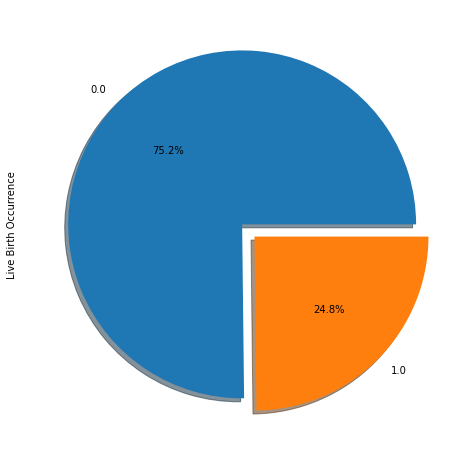

In [16]:
plt.figure(figsize=(8,8))
fig = impute['Live Birth Occurrence'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

From the graph above we can tell that the target variable data is highly imbalance with over 75% of 0 values.

#### 2. Patient at age treatment

In [18]:
age_convert = {'18 - 34':0, '35-37':1, '38-39':2, '40-42':3, '43-44':4, '45-50':5}

In [15]:
def replace_age(input_data, cats):
    """
    Function to encode age
    """
    data = input_data.copy()
    data.drop(data[data['Patient Age at Treatment'] == '999'].index, inplace = True)
    data['Patient Age at Treatment'] = data['Patient Age at Treatment'].replace(cats)
    
    return data

In [19]:
data = replace_age(df_train, age_convert)

<AxesSubplot:xlabel='Patient Age at Treatment', ylabel='count'>

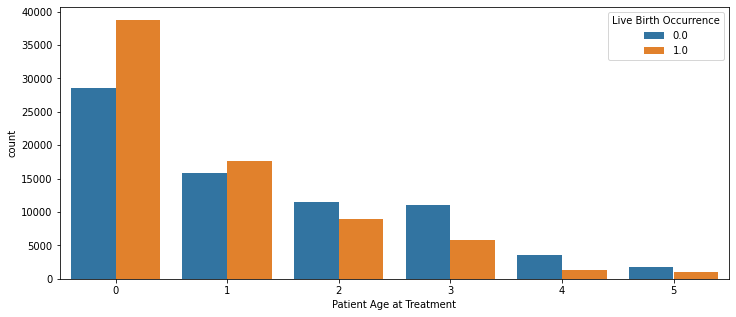

In [21]:
plt.figure(figsize=(12,5))
sns.countplot('Patient Age at Treatment',hue='Live Birth Occurrence',data=data)

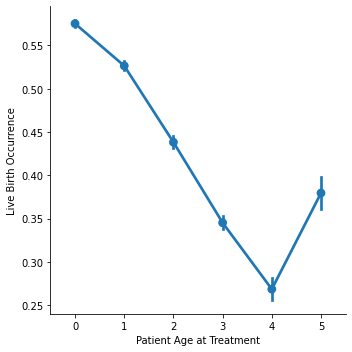

In [22]:
sns.factorplot('Patient Age at Treatment','Live Birth Occurrence',data=data)
plt.show()

Younger patients will more likely to have live birth.

#### 3. Total Number of Previous IVF cycles

In [23]:
def to_numeric(input_data, do=True):
    '''
    Function to convert string to numerical data
    '''
    data = input_data.copy()
    
    # replace '> 50' with 51
    data['Fresh Eggs Collected'] = data['Fresh Eggs Collected'].replace(['> 50'],[51])
    data['Eggs Mixed With Partner Sperm'] = data['Eggs Mixed With Partner Sperm'].replace(['> 50'],[51])
    
    # replace '>=5' with 6
    data['Total Number of Previous IVF cycles'] = data['Total Number of Previous IVF cycles'].replace(['>=5'],[6])
    data['Total number of IVF pregnancies'] = data['Total number of IVF pregnancies'].replace(['>=5'],[6])
    
    # convert to numerical data
    data['Fresh Eggs Collected'] = pd.to_numeric(data['Fresh Eggs Collected'])
    data['Eggs Mixed With Partner Sperm'] = pd.to_numeric(data['Eggs Mixed With Partner Sperm'])
    data['Total Number of Previous IVF cycles'] = pd.to_numeric(data['Total Number of Previous IVF cycles'])
    data['Total number of IVF pregnancies'] = pd.to_numeric(data['Total number of IVF pregnancies'])
    
    return data

In [24]:
data = to_numeric(data)

<AxesSubplot:xlabel='Total Number of Previous IVF cycles', ylabel='count'>

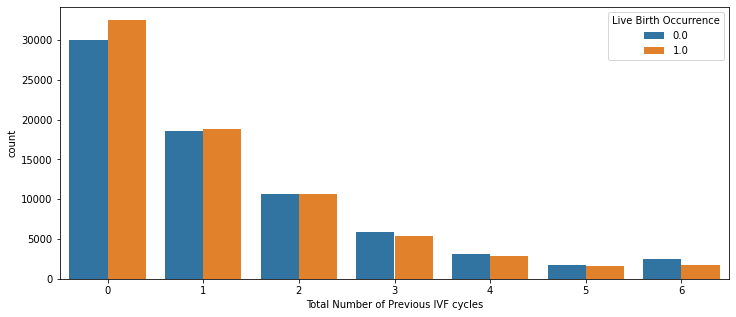

In [25]:
plt.figure(figsize=(12,5))
sns.countplot('Total Number of Previous IVF cycles',hue='Live Birth Occurrence',data=data)

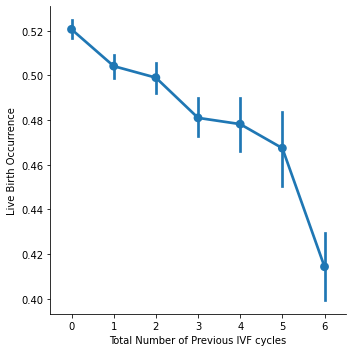

In [26]:
sns.factorplot('Total Number of Previous IVF cycles','Live Birth Occurrence', data=data)
plt.show()

Patients who've been through many IVF cycles have smaller chance of live birth occurence.

#### 4. Total number of IVF pregnancies 

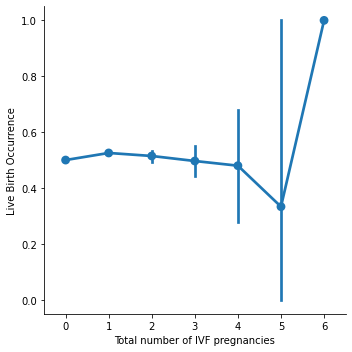

In [27]:
sns.factorplot('Total number of IVF pregnancies','Live Birth Occurrence', data=data)
plt.show()

In [28]:
data['Total number of IVF pregnancies'].value_counts()

0    121292
1     21844
2      2512
3       308
4        25
5         3
6         1
Name: Total number of IVF pregnancies, dtype: int64

Patients who've had many IVF pregnancies have smaller chance of live birth occurence.

#### 5.Total number of live births - conceived through IVF

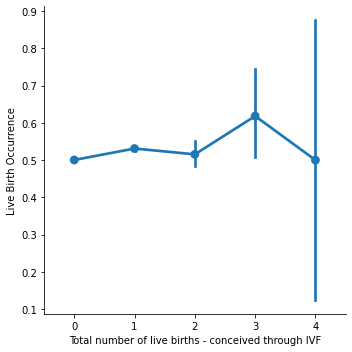

In [29]:
sns.factorplot('Total number of live births - conceived through IVF','Live Birth Occurrence', data=data)
plt.show()

No notable patern can be found in this feature data.

#### 6. Type of Infertility

In [30]:
col1 = ['Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
      'Live Birth Occurrence']

type_ = data[col1]

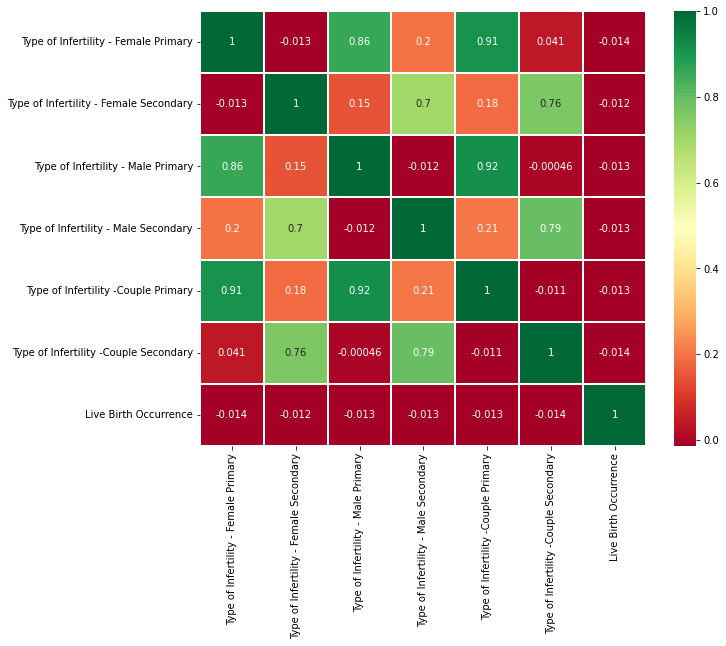

In [31]:
sns.heatmap(type_.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Although not significant, we can see that type of infertility feature are negatively correlated with the taget variable.

#### 7. Cause of Infertility

In [41]:
col2 = ['Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility - Partner Sperm Concentration',
       'Cause of Infertility -  Partner Sperm Morphology',
       'Causes of Infertility - Partner Sperm Motility',
       'Cause of Infertility -  Partner Sperm Immunological factors',
      'Live Birth Occurrence']

cause = data[col2]

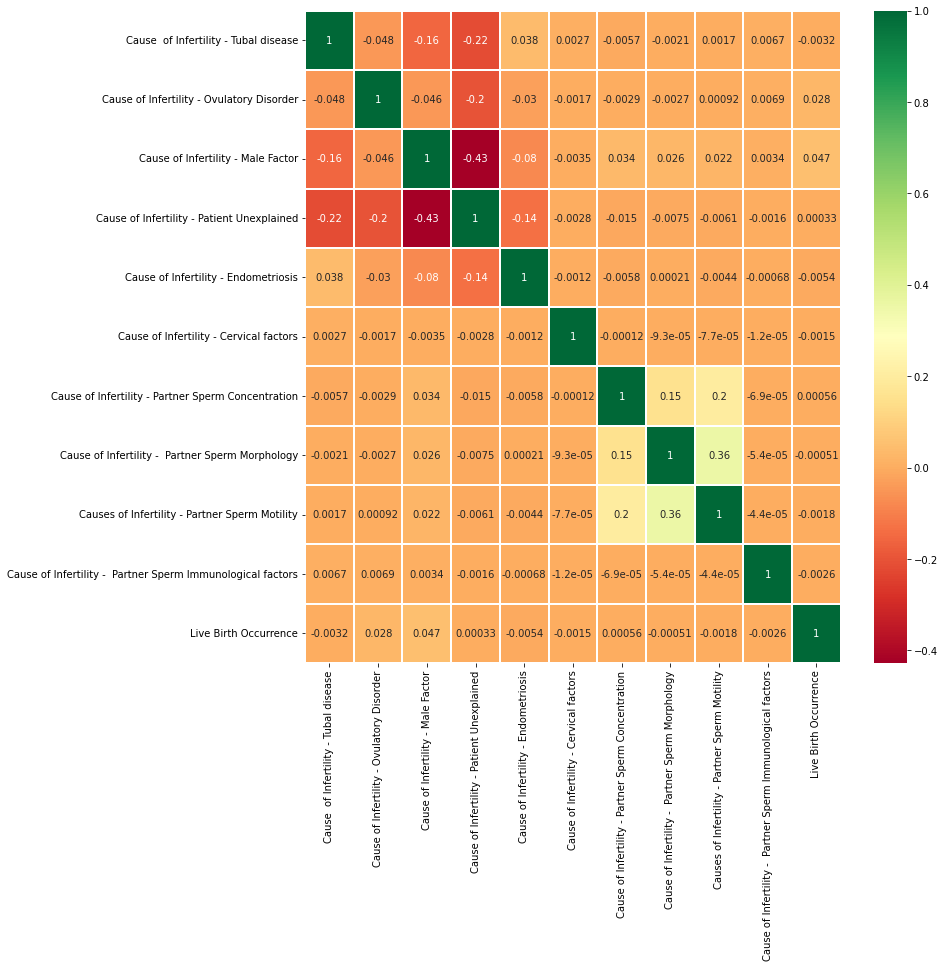

In [42]:
sns.heatmap(cause.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Although not significant, we can see that cause of infertility feature are positively correlated with the taget variable.

#### 8. Stimulation Used

<AxesSubplot:xlabel='Stimulation used', ylabel='count'>

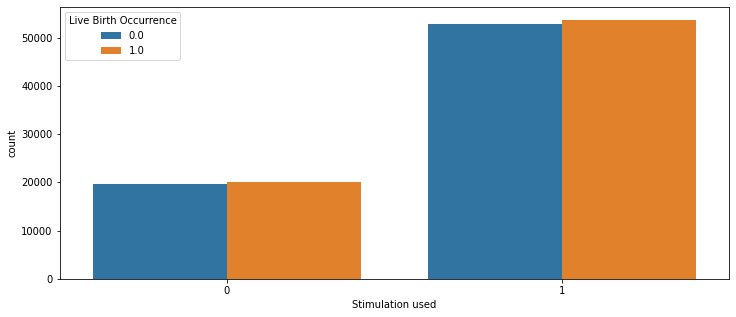

In [44]:
plt.figure(figsize=(12,5))
sns.countplot('Stimulation used',hue='Live Birth Occurrence',data=data)

Looking throgh this graph, patient without stimulation medication will more likely to have live birth.

#### 9. Egg Source

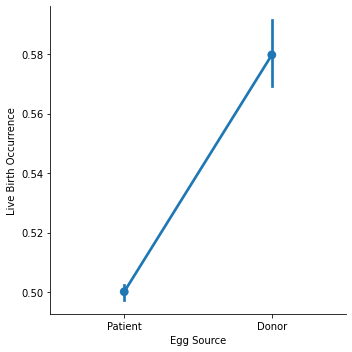

In [46]:
sns.factorplot('Egg Source','Live Birth Occurrence', data=data)
plt.show()

In [65]:
data['Egg Source'].value_counts()

Patient    432047
Donor       21741
Name: Egg Source, dtype: int64

Treatment with donored egg will more likely to succeed.

#### 10. Sperm From

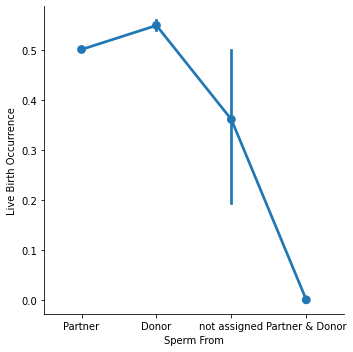

In [34]:
sns.factorplot('Sperm From','Live Birth Occurrence', data=data)
plt.show()

In [37]:
data['Sperm From'].value_counts()

Partner            425263
Donor               28351
not assigned          155
Partner & Donor        19
Name: Sperm From, dtype: int64

Treatment with donored sperm will more likely to succeed.

#### 11. Fresh or Frozen Cycle

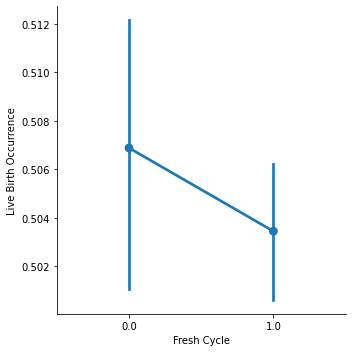

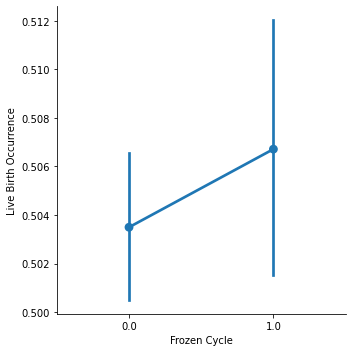

In [35]:
sns.factorplot('Fresh Cycle','Live Birth Occurrence', data=data)
sns.factorplot('Frozen Cycle','Live Birth Occurrence', data=data)
plt.show()

Treatment with frozen embryos will more likely to succeed.

#### 12. Eggs Thawed

In [36]:
et = data[data['Eggs Thawed'] != 0].reset_index()

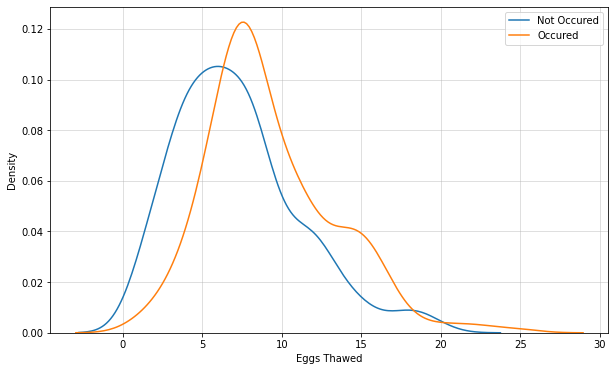

In [37]:
plt.figure(figsize=(10,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(et.loc[et['Live Birth Occurrence'] == 0, 'Eggs Thawed'], label = 'Not Occured')
sns.kdeplot(et.loc[et['Live Birth Occurrence'] == 1, 'Eggs Thawed'] ,  label = 'Occured')
plt.xlabel('Eggs Thawed')
plt.ylabel('Density')
plt.legend()

The more number of eggs thawed, the more likely treatment to succeed.

#### 13. Fresh Egg Collected

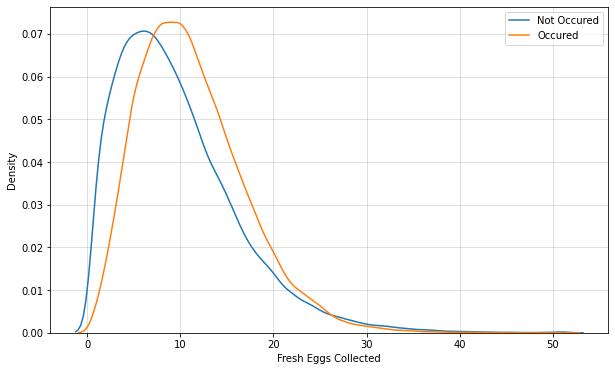

In [38]:
fec = data[data['Fresh Eggs Collected'] != 0].reset_index()

plt.figure(figsize=(10,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(fec.loc[fec['Live Birth Occurrence'] == 0, 'Fresh Eggs Collected'], label = 'Not Occured')
sns.kdeplot(fec.loc[fec['Live Birth Occurrence'] == 1, 'Fresh Eggs Collected'] ,  label = 'Occured')
plt.xlabel('Fresh Eggs Collected')
plt.ylabel('Density')
plt.legend()

The more number of fresh eggs collected, the more likely the treatment to succeed.

#### 14. Eggs Mixed with Partner Sperm

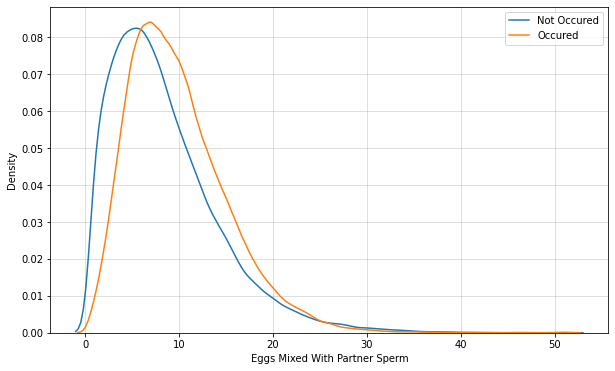

In [39]:
em = data[data['Eggs Mixed With Partner Sperm'] != 0].reset_index()

plt.figure(figsize=(10,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(em.loc[em['Live Birth Occurrence'] == 0, 'Eggs Mixed With Partner Sperm'], label = 'Not Occured')
sns.kdeplot(em.loc[em['Live Birth Occurrence'] == 1, 'Eggs Mixed With Partner Sperm'] ,  label = 'Occured')
plt.xlabel('Eggs Mixed With Partner Sperm')
plt.ylabel('Density')
plt.legend()

The more number of eggs mixed with partner sperm, the more likely the treatment to succeed.

#### 15. Embryos Transfered

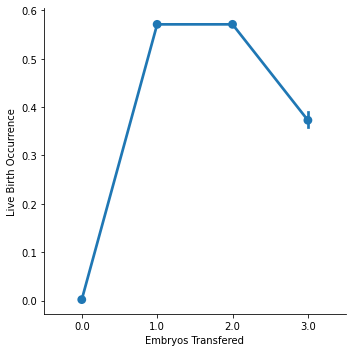

In [40]:
sns.factorplot('Embryos Transfered','Live Birth Occurrence', data=data)
plt.show()

Patient with 0 embryos transfered will have a small chance of succeeding the treatment.